<a href="https://colab.research.google.com/github/ArpanMahato99/ML-Lab/blob/main/LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.70614524],
       [3.16695835]])

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best) # y_predict = x * thetha
y_predict

array([[ 3.70614524],
       [10.04006193]])

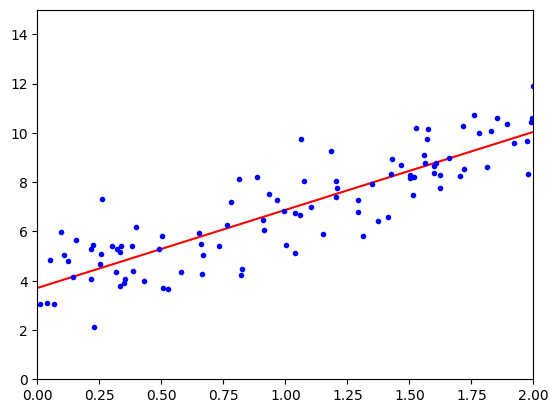

In [4]:
from matplotlib import pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.70614524]), array([[3.16695835]]))

In [6]:
lin_reg.predict(X_new)

array([[ 3.70614524],
       [10.04006193]])

### Gradient Descent

In [7]:
eta = 0.1 # learning rate
def gradient(eta = 0.1):
    n_iterations = 1000
    m = 100
    theta = np.random.randn(2,1) # random initialization
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        X_new = np.array([[0], [2]])
        X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "r-")
        plt.plot(X, y, "b.")
        plt.axis([0, 2, 0, 15])
    plt.show()

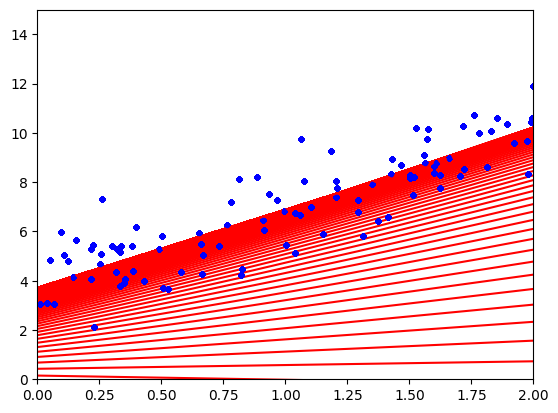

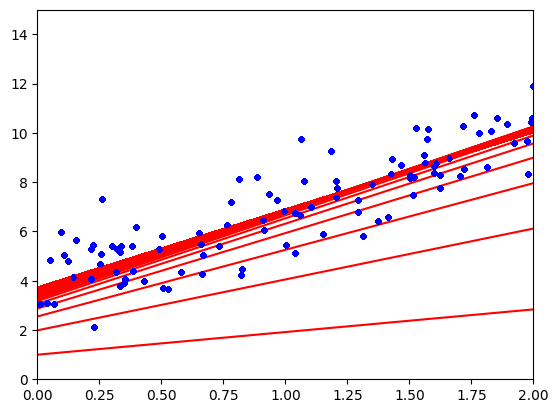

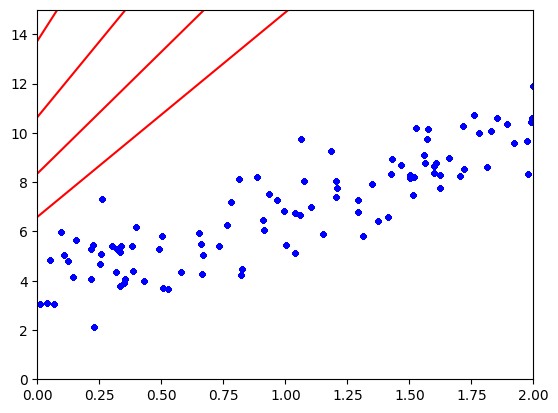

In [8]:
eta_array = [0.02, 0.1, 0.5]
for eta in eta_array:
    gradient(eta)

### Stocahastic Gradient Descent

In [9]:
n_epochs = 50
t0, t1 = 5, 50
n = 1000
m = 100

In [10]:
def learning_schedule(t):
    return t0 / (t + t1)

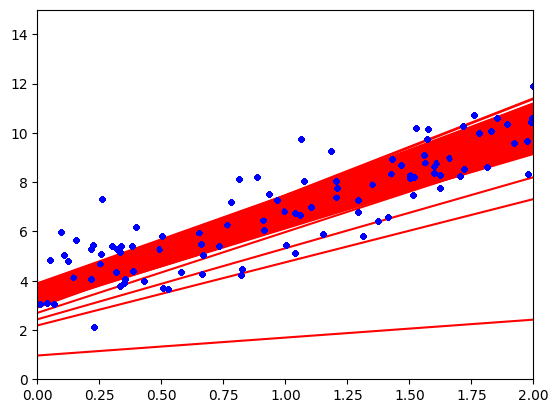

In [11]:
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        X_new = np.array([[0], [2]])
        X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "r-")
        plt.plot(X, y, "b.")
        plt.axis([0, 2, 0, 15])

In [12]:
theta

array([[3.75067344],
       [3.13136474]])

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.6770027]), array([3.14520901]))

## Polynomial Regression

In [15]:
m = 100
X= 6*np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [22]:
X

array([[ 1.28388329],
       [ 2.81641513],
       [ 1.66462485],
       [-1.6027771 ],
       [-1.30238524],
       [ 1.527163  ],
       [ 2.92861954],
       [ 0.80650335],
       [ 0.77632913],
       [-1.17246934],
       [-1.99287607],
       [-1.62380407],
       [-0.09656092],
       [ 0.5197516 ],
       [-1.80672819],
       [-0.04668093],
       [ 0.79543783],
       [ 0.60098829],
       [ 1.26970147],
       [ 0.61007084],
       [ 1.19884445],
       [-2.46401977],
       [-0.72789695],
       [-0.66328063],
       [-1.42539869],
       [-1.9208647 ],
       [-0.99377495],
       [-2.48827824],
       [-1.55368964],
       [ 1.92588245],
       [-0.18344888],
       [-0.30029049],
       [-1.85799069],
       [-0.34493704],
       [-1.24832624],
       [-0.47498175],
       [-2.83374136],
       [-1.05400732],
       [-2.38060418],
       [-2.22988418],
       [-2.17680075],
       [ 2.79852295],
       [ 1.45474122],
       [-0.35217929],
       [-1.38604724],
       [-1

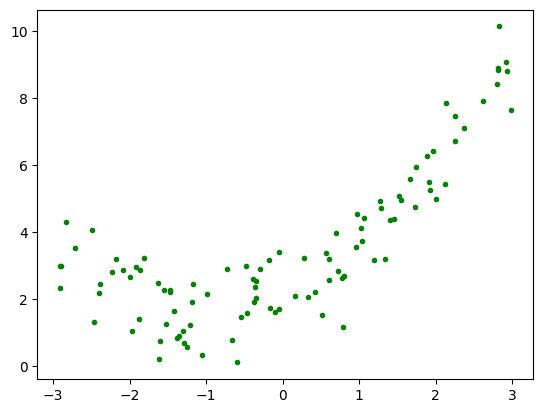

In [23]:
plt.plot(X, y, "g." )
plt.show()

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [28]:
X_poly

array([[ 1.28388329e+00,  1.64835631e+00],
       [ 2.81641513e+00,  7.93219421e+00],
       [ 1.66462485e+00,  2.77097589e+00],
       [-1.60277710e+00,  2.56889443e+00],
       [-1.30238524e+00,  1.69620730e+00],
       [ 1.52716300e+00,  2.33222682e+00],
       [ 2.92861954e+00,  8.57681241e+00],
       [ 8.06503354e-01,  6.50447659e-01],
       [ 7.76329134e-01,  6.02686924e-01],
       [-1.17246934e+00,  1.37468436e+00],
       [-1.99287607e+00,  3.97155504e+00],
       [-1.62380407e+00,  2.63673965e+00],
       [-9.65609222e-02,  9.32401169e-03],
       [ 5.19751600e-01,  2.70141725e-01],
       [-1.80672819e+00,  3.26426676e+00],
       [-4.66809265e-02,  2.17910890e-03],
       [ 7.95437827e-01,  6.32721336e-01],
       [ 6.00988291e-01,  3.61186926e-01],
       [ 1.26970147e+00,  1.61214181e+00],
       [ 6.10070836e-01,  3.72186425e-01],
       [ 1.19884445e+00,  1.43722803e+00],
       [-2.46401977e+00,  6.07139344e+00],
       [-7.27896954e-01,  5.29833976e-01],
       [-6.

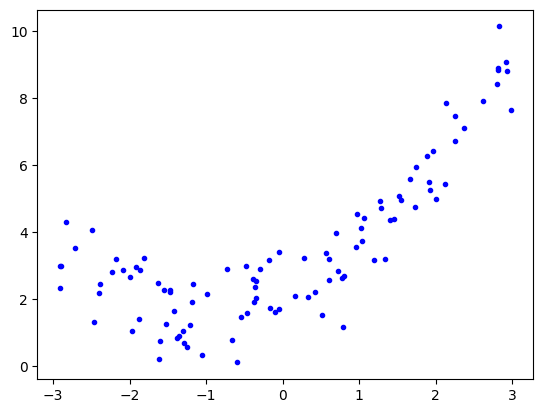

In [29]:
plt.plot(X, y, "b." )
# plt.show()
# plt.plot(X_poly[:,0], X_poly[:,1],"r-")
plt.show()

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.14218394]), array([[0.97611555, 0.47758416]]))

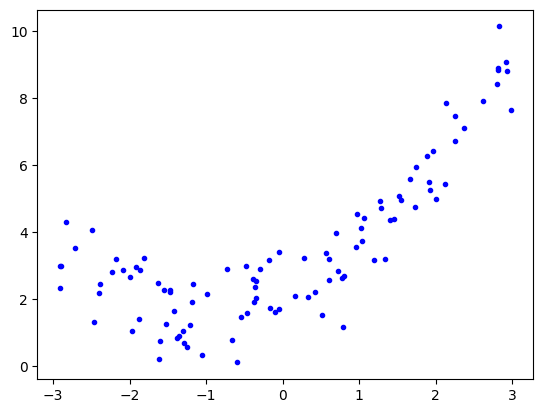

In [31]:
plt.plot(X, y, "b." )
# plt.show()
plt.plot(lin_reg.intercept_, lin_reg.coef_,"r-")
plt.show()